#FMQI

In [ ]:
! pip install --quiet qiskit
! pip install --quiet pylatexenc
! pip install --quiet qiskit-aer
# ! pip install --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 38.9 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile, QuantumRegister
from qiskit_aer import Aer
import numpy as np
import random
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mutual_info_score, r2_score
from qiskit.circuit.library.standard_gates import RYGate, RYYGate
import cv2
import pandas as pd

In [ ]:
def hadamard(circ, n):
  for i in n:
    circ.h(i)

In [ ]:
def change(state, new_state):
  n = len(state)
  c = np.array([])
  for i in range(n):
    if state[i] != new_state[i]:
      c = np.append(c, int(i))
  print(f"C value as per the change is {c}")
  if len(c)>0:
    return c.astype(int)
  else:
    return c

In [ ]:
def binary(circ, state, new_state):
  c = change(state, new_state)
  print(f"The value of c is {c}")
  if len(c) > 0:
    circ.x(np.abs(c-5))
  else:
    pass

In [ ]:
def cnri(circ, n, t, theta):
  controls = len(n)
  cry = RYGate(2*theta).control(controls)
  aux = np.append(n, t).tolist()
  print(f'aux value is {aux}')
  circ.append(cry, aux)

def frqi(circ, n, t, angles):
  hadamard(circ, n)
  j = 0
  for i in angles:
    state = '{0:06b}'.format(j-1)
    new_state = '{0:06b}'.format(j)
    print(f'State and new_state with iteration {state, new_state, i}')
    if j == 0:
      cnri(circ, n, t, i)
    else:
      binary(circ, state, new_state)
      cnri(circ, n, t, i)
    j += 1

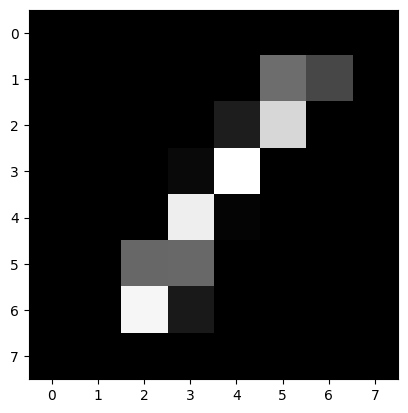

In [146]:
dataset = pd.read_csv('mnist-resized.csv')
images = dataset.to_numpy()[:, 1:].reshape(42000, 8, 8)
pixel_values = images.reshape(42000, 64)
plt.imshow(images[0, :], cmap='gray')

In [ ]:
normalized_pixels = pixel_values/255.0
angles = np.arcsin(normalized_pixels[0,:])

In [ ]:
qr = QuantumRegister(7, 'q')
cr = ClassicalRegister(7, 'c')
qc = QuantumCircuit(qr, cr)
frqi(qc, [0, 1, 2, 3, 4, 5], 6, angles)

State and new_state with iteration ('-00001', '000000', 0.0)
aux value is [0, 1, 2, 3, 4, 5, 6]
State and new_state with iteration ('000000', '000001', 0.0)
C value as per the change is [5.]
The value of c is [5]
aux value is [0, 1, 2, 3, 4, 5, 6]
State and new_state with iteration ('000001', '000010', 0.0)
C value as per the change is [4. 5.]
The value of c is [4 5]
aux value is [0, 1, 2, 3, 4, 5, 6]
State and new_state with iteration ('000010', '000011', 0.0)
C value as per the change is [5.]
The value of c is [5]
aux value is [0, 1, 2, 3, 4, 5, 6]
State and new_state with iteration ('000011', '000100', 0.0)
C value as per the change is [3. 4. 5.]
The value of c is [3 4 5]
aux value is [0, 1, 2, 3, 4, 5, 6]
State and new_state with iteration ('000100', '000101', 0.0)
C value as per the change is [5.]
The value of c is [5]
aux value is [0, 1, 2, 3, 4, 5, 6]
State and new_state with iteration ('000101', '000110', 0.0)
C value as per the change is [4. 5.]
The value of c is [4 5]
aux val

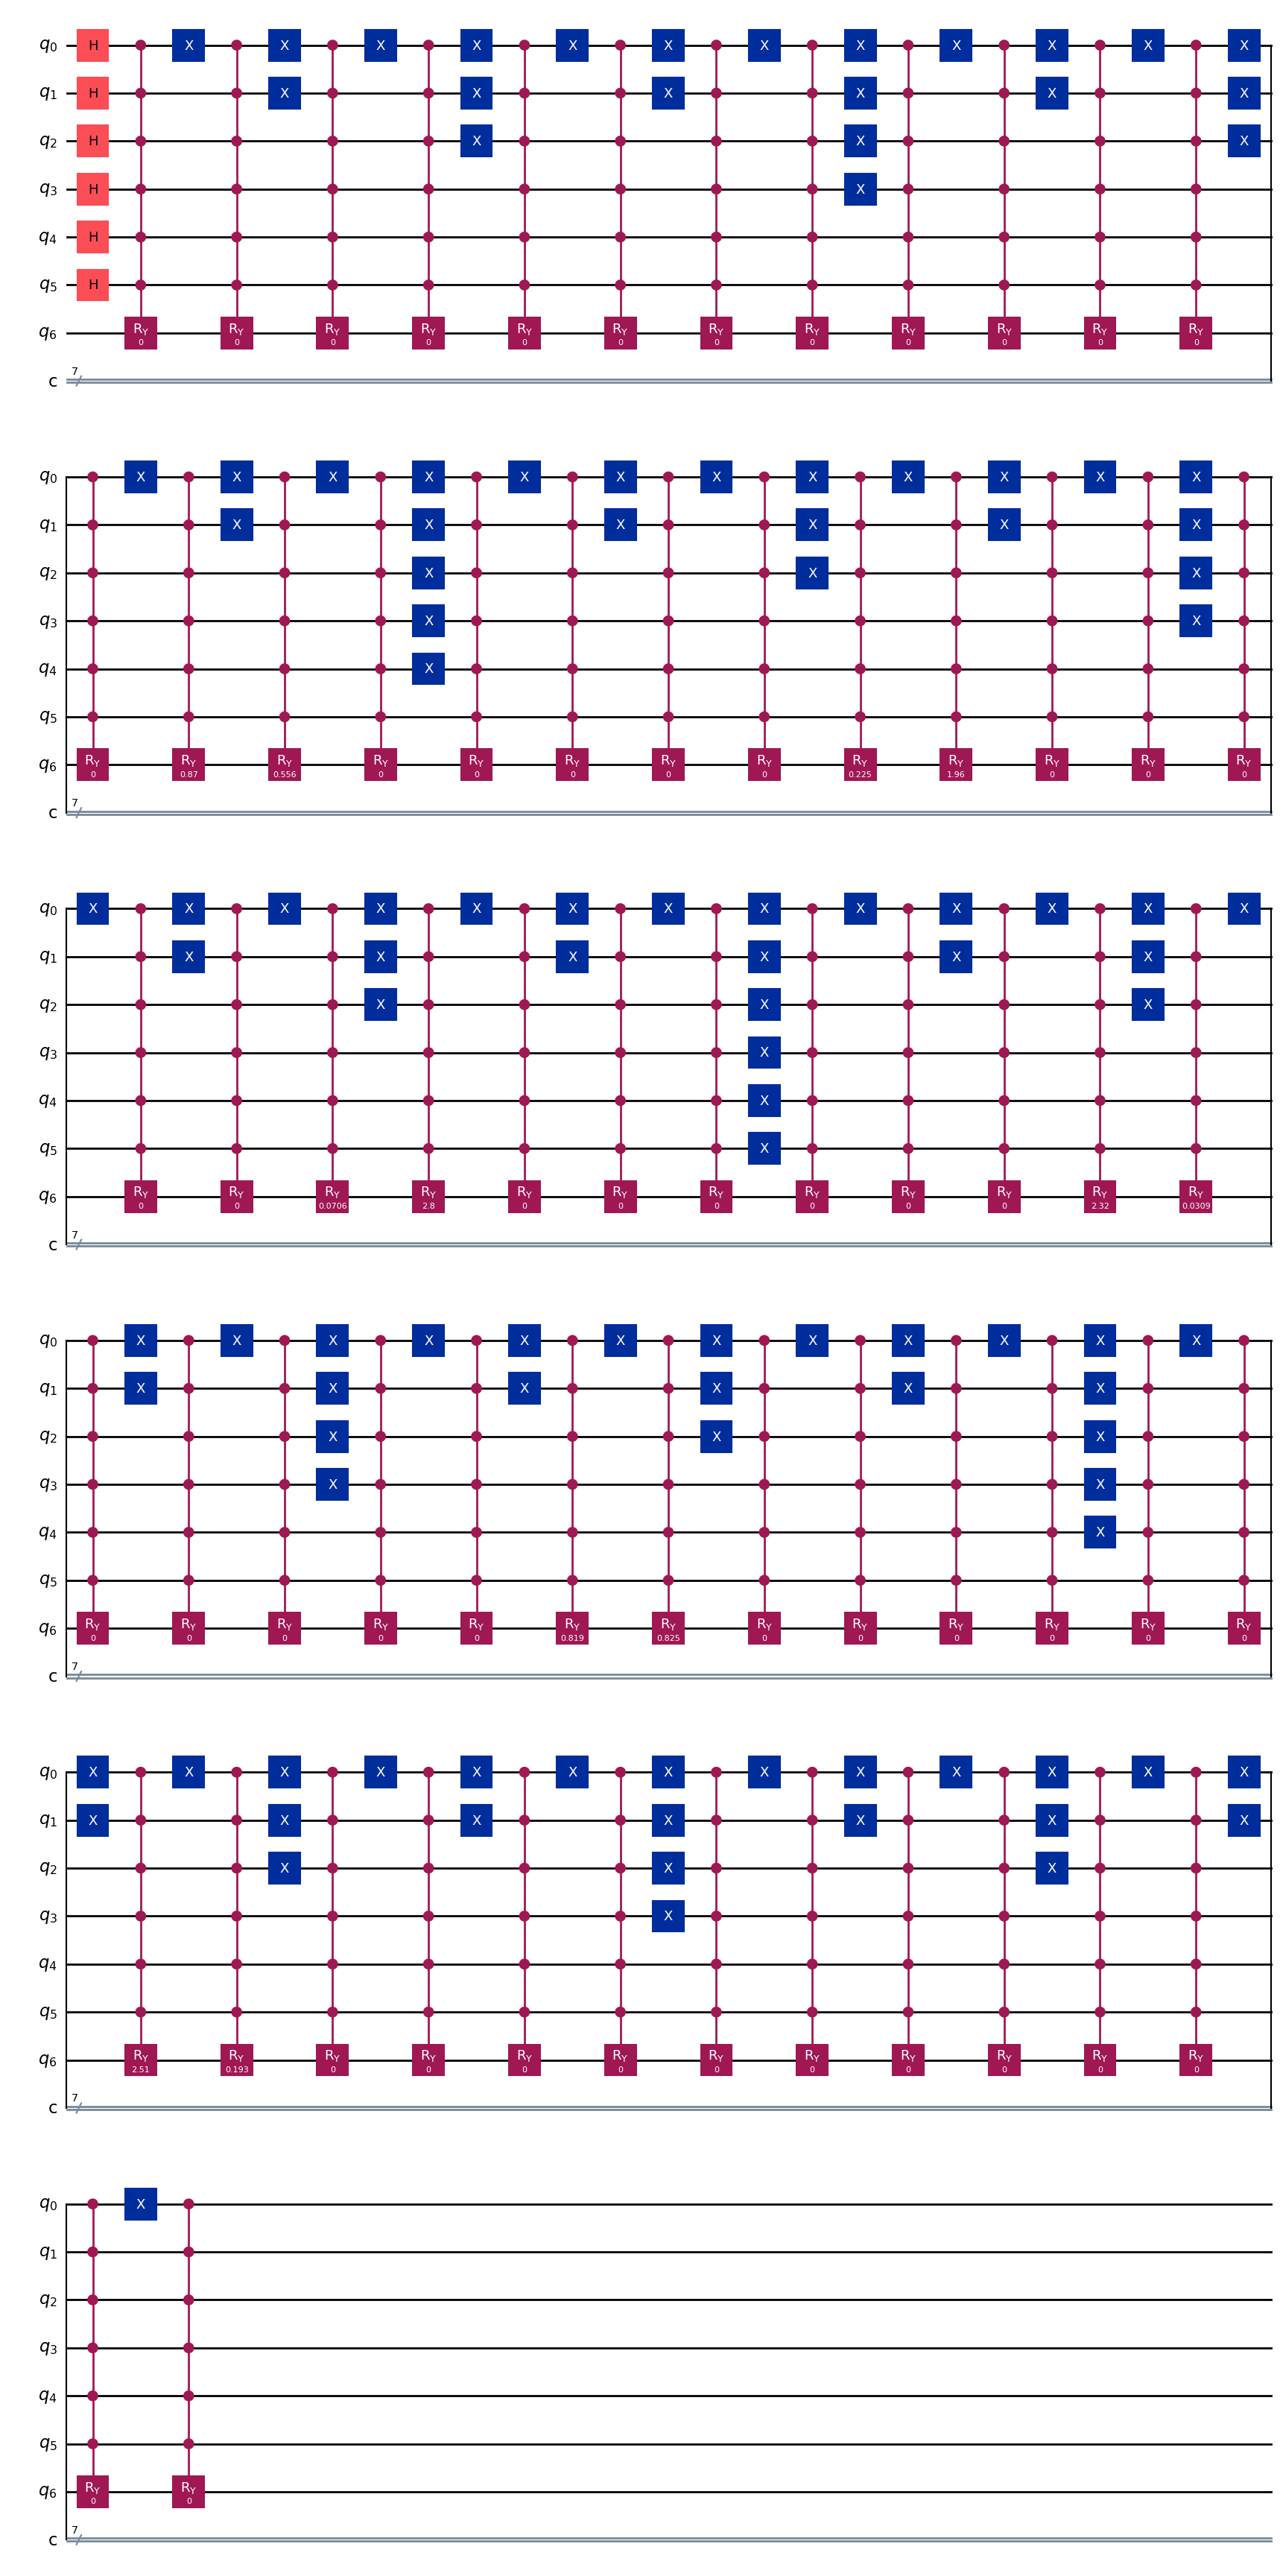

In [ ]:
qc.draw(output='mpl')

In [ ]:
qc.measure([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6])

In [ ]:
simulator = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(qc, backend=simulator)
result = simulator.run(transpiled_circuit, backend=simulator, shots=1)
counts = result.result().get_counts()
print(counts)

{'0101000101': 1}


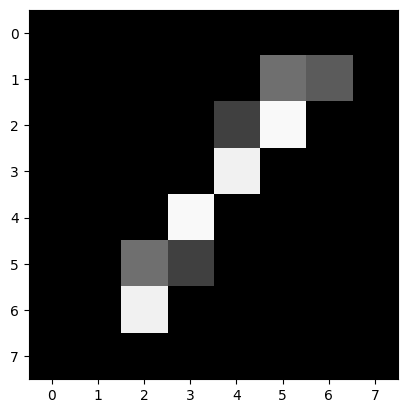

In [ ]:


# Create an empty array to save the retrieved image
retrieve_image = np.array([])


# We iterate over all the pixels and obtain the proability results for each one of them
# Notice that we compute the ratio of the white states, and only if the values are 0
# we make an exception and turn that pixel 0
for i in range(64):
  try:
    s = format(i, '06b')
    new_s = '1' + s
    retrieve_image = np.append(retrieve_image,np.sqrt(counts[new_s]/1000))
  except KeyError:
    retrieve_image = np.append(retrieve_image,[0.0])


# We make the inverse nomalization
retrieve_image *=  8.0*255.0


# Turn the array into a type int
retrieve_image = retrieve_image.astype('int')


# Reshape the array into a 8x8 matrix
retrieve_image = retrieve_image.reshape((8,8))


# Plot the retrieved image to see if it is the same as the one encoded
plt.imshow(retrieve_image, cmap='gray', vmin=0, vmax=255)
plt.show()



#NEQR

In [86]:
! pip install --quiet qiskit
! pip install --quiet pylatexenc
! pip install --quiet qiskit-aer

In [87]:
#Importing Necessary Libraries

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile, QuantumRegister
from qiskit_aer import Aer
import numpy as np
import qiskit
import random
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mutual_info_score, r2_score
from qiskit.circuit.library.standard_gates import RYGate, RYYGate, MCXGate
import cv2
import pandas as pd

[[120 255 236 158   9 253  88 229]
 [220 234 212 229  43 246 113 172]
 [242 148 196 169  23 148  67 137]
 [240  73 204  37 251  59 231 172]
 [191 124 173  90 195 173 116 177]
 [ 81  88  73  47 155 217  50 106]
 [243  70  94 124  44  10 163 139]
 [240 223 197 142  80 210  46  52]]


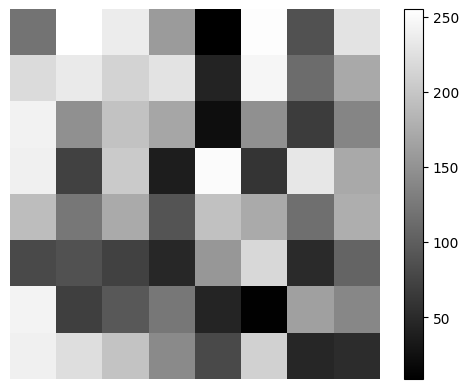

In [127]:
import numpy as np

# Generate an 8x8 array with random values between 0 and 255 (inclusive)
random_array = np.random.randint(0, 256, size=(8,8))

# Visualization of the random array generated
print(random_array)
plt.imshow(random_array, cmap='gray')
plt.colorbar()
plt.show()



Shape of images (42000, 8, 8)


(8, 8)

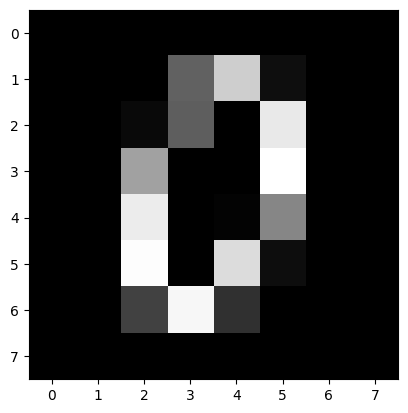

In [142]:
dataset = pd.read_csv('mnist-resized.csv')
images = dataset.to_numpy()[:, 1:].reshape(42000, 8, 8)
print(f'Shape of images {images.shape}')
pixel_values = images.reshape(42000, 64)
plt.imshow(images[5, :], cmap='gray')
images[5].shape


In [138]:
#Applying Hadamard Gate for qubits used for pixel location
def hadamard(circ, n):
  for i in n:
    circ.h(i)

In [143]:
from os import name
import math

images = np.array([images[5]])
# images = np.array([random_array])

print(images.shape)

# Using qubit properties, we can represent 2**n values using n qubits
n = int(math.log2(images[0].shape[0]))
q = 8


def SetState(qc, position_x, position_y, q, intensity):
  for i in range(n):
    if position_y[i] == '0':
      qc.x(q + i)
  for i in range(n):
    if position_x[i] == '0':
      # print(n, q, i)
      qc.x(q + n + i)

  control_bits = []
  for i in range(2 * n):
    control_bits.append(q+i)

  intensity = intensity[::-1]
  for i in range(len(intensity)):
    if intensity[i] == '1':
      qc.mcx(control_bits, i)

  for i in range(n):
    if position_y[i] == '0':
      qc.x(q + i)
  for i in range(n):
    if position_x[i] == '0':
      qc.x(q + n + i)


  return qc

def neqr(n, q):
  hadamard_gates = []
  qc = QuantumCircuit(2*n+q, 2*n+q)
  for i in range(2*n + q):
    if i >= q:
      hadamard_gates.append(i)
  hadamard(qc, hadamard_gates)
  qc.barrier()
  for i in range(len(images[0])):
    for j in range(len(images[0][0])):
      position_x = bin(i)[2:].zfill(n)
      position_y = bin(j)[2:].zfill(n)
      intensity = bin(int(images[0][i][j]))[2:].zfill(q)
      qc = SetState(qc, position_x, position_y, q, intensity)
      qc.barrier()
  return qc

qc = neqr(n, q)
qc.measure([i for i in range(2*n + q)], [i for i in range(2*n +q)])
# qc.draw(output="mpl")

(1, 8, 8)


In [144]:
simulator = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(qc, backend=simulator)
result = simulator.run(transpiled_circuit, backend=simulator, shots=5000)
counts = result.result().get_counts()
print(counts)
print(len(counts))

{'00111000000000': 72, '00100100000011': 101, '10011100000000': 80, '00110110000001': 57, '10000111000110': 85, '00101100000000': 72, '11000100000000': 93, '10111100000000': 67, '00101011100010': 61, '10110000000000': 58, '10110100001100': 76, '01111100000000': 73, '11111100000000': 84, '00011000000000': 100, '10101011110011': 77, '10000000000000': 67, '01011100000000': 81, '01110000000000': 96, '01000100000000': 67, '10010000000000': 76, '00011100000000': 91, '11111000000000': 77, '01111011101101': 97, '00000000000000': 75, '01110100000000': 86, '10100000000000': 68, '11101000000000': 69, '10101100000000': 86, '00110000000000': 69, '10011001011110': 82, '11100000000000': 73, '01101000111111': 75, '01001000001000': 84, '00000100000000': 87, '11001010011011': 97, '01100000000000': 78, '11011000000000': 71, '11001100000000': 78, '11110000000000': 85, '00001000000000': 85, '10001000000000': 61, '01001100000000': 77, '01000000000000': 81, '00010100000000': 74, '11101100000000': 80, '110101

(8, 8) 3


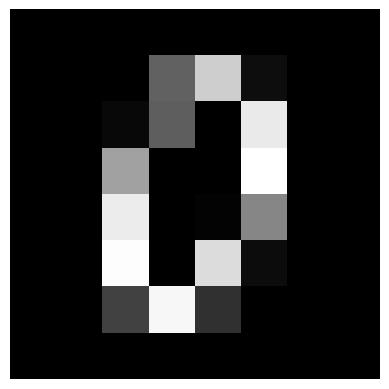

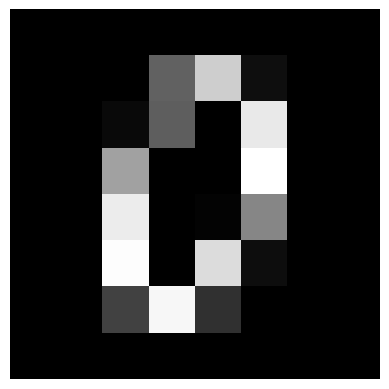

In [145]:
import numpy as np
from PIL import Image

restored_image = np.random.randint(0, 256, size=(2**n, 2**n))
print(restored_image.shape, n)

for value in counts:
  x_coordinate = int(value[:n][::-1], 2)
  y_coordinate = int(value[n:2*n][::-1], 2)
  intensity = int(value[2*n:],2)
  restored_image[x_coordinate][y_coordinate] = intensity


#Depicting both images
plt.imshow(restored_image, cmap='gray')
plt.axis('off')
plt.show()

plt.imshow(images[0], cmap='gray')
plt.axis('off')
plt.show()